In [47]:
A = 0
B = -2
N = 10000

10000

In [43]:
import Pkg

Pkg.add("Nemo")
Pkg.add("PyPlot")
Pkg.add("Primes")
Pkg.add("CPUTime")

using Nemo
using Primes
using PyPlot: PyPlot, plt
using CPUTime

 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]


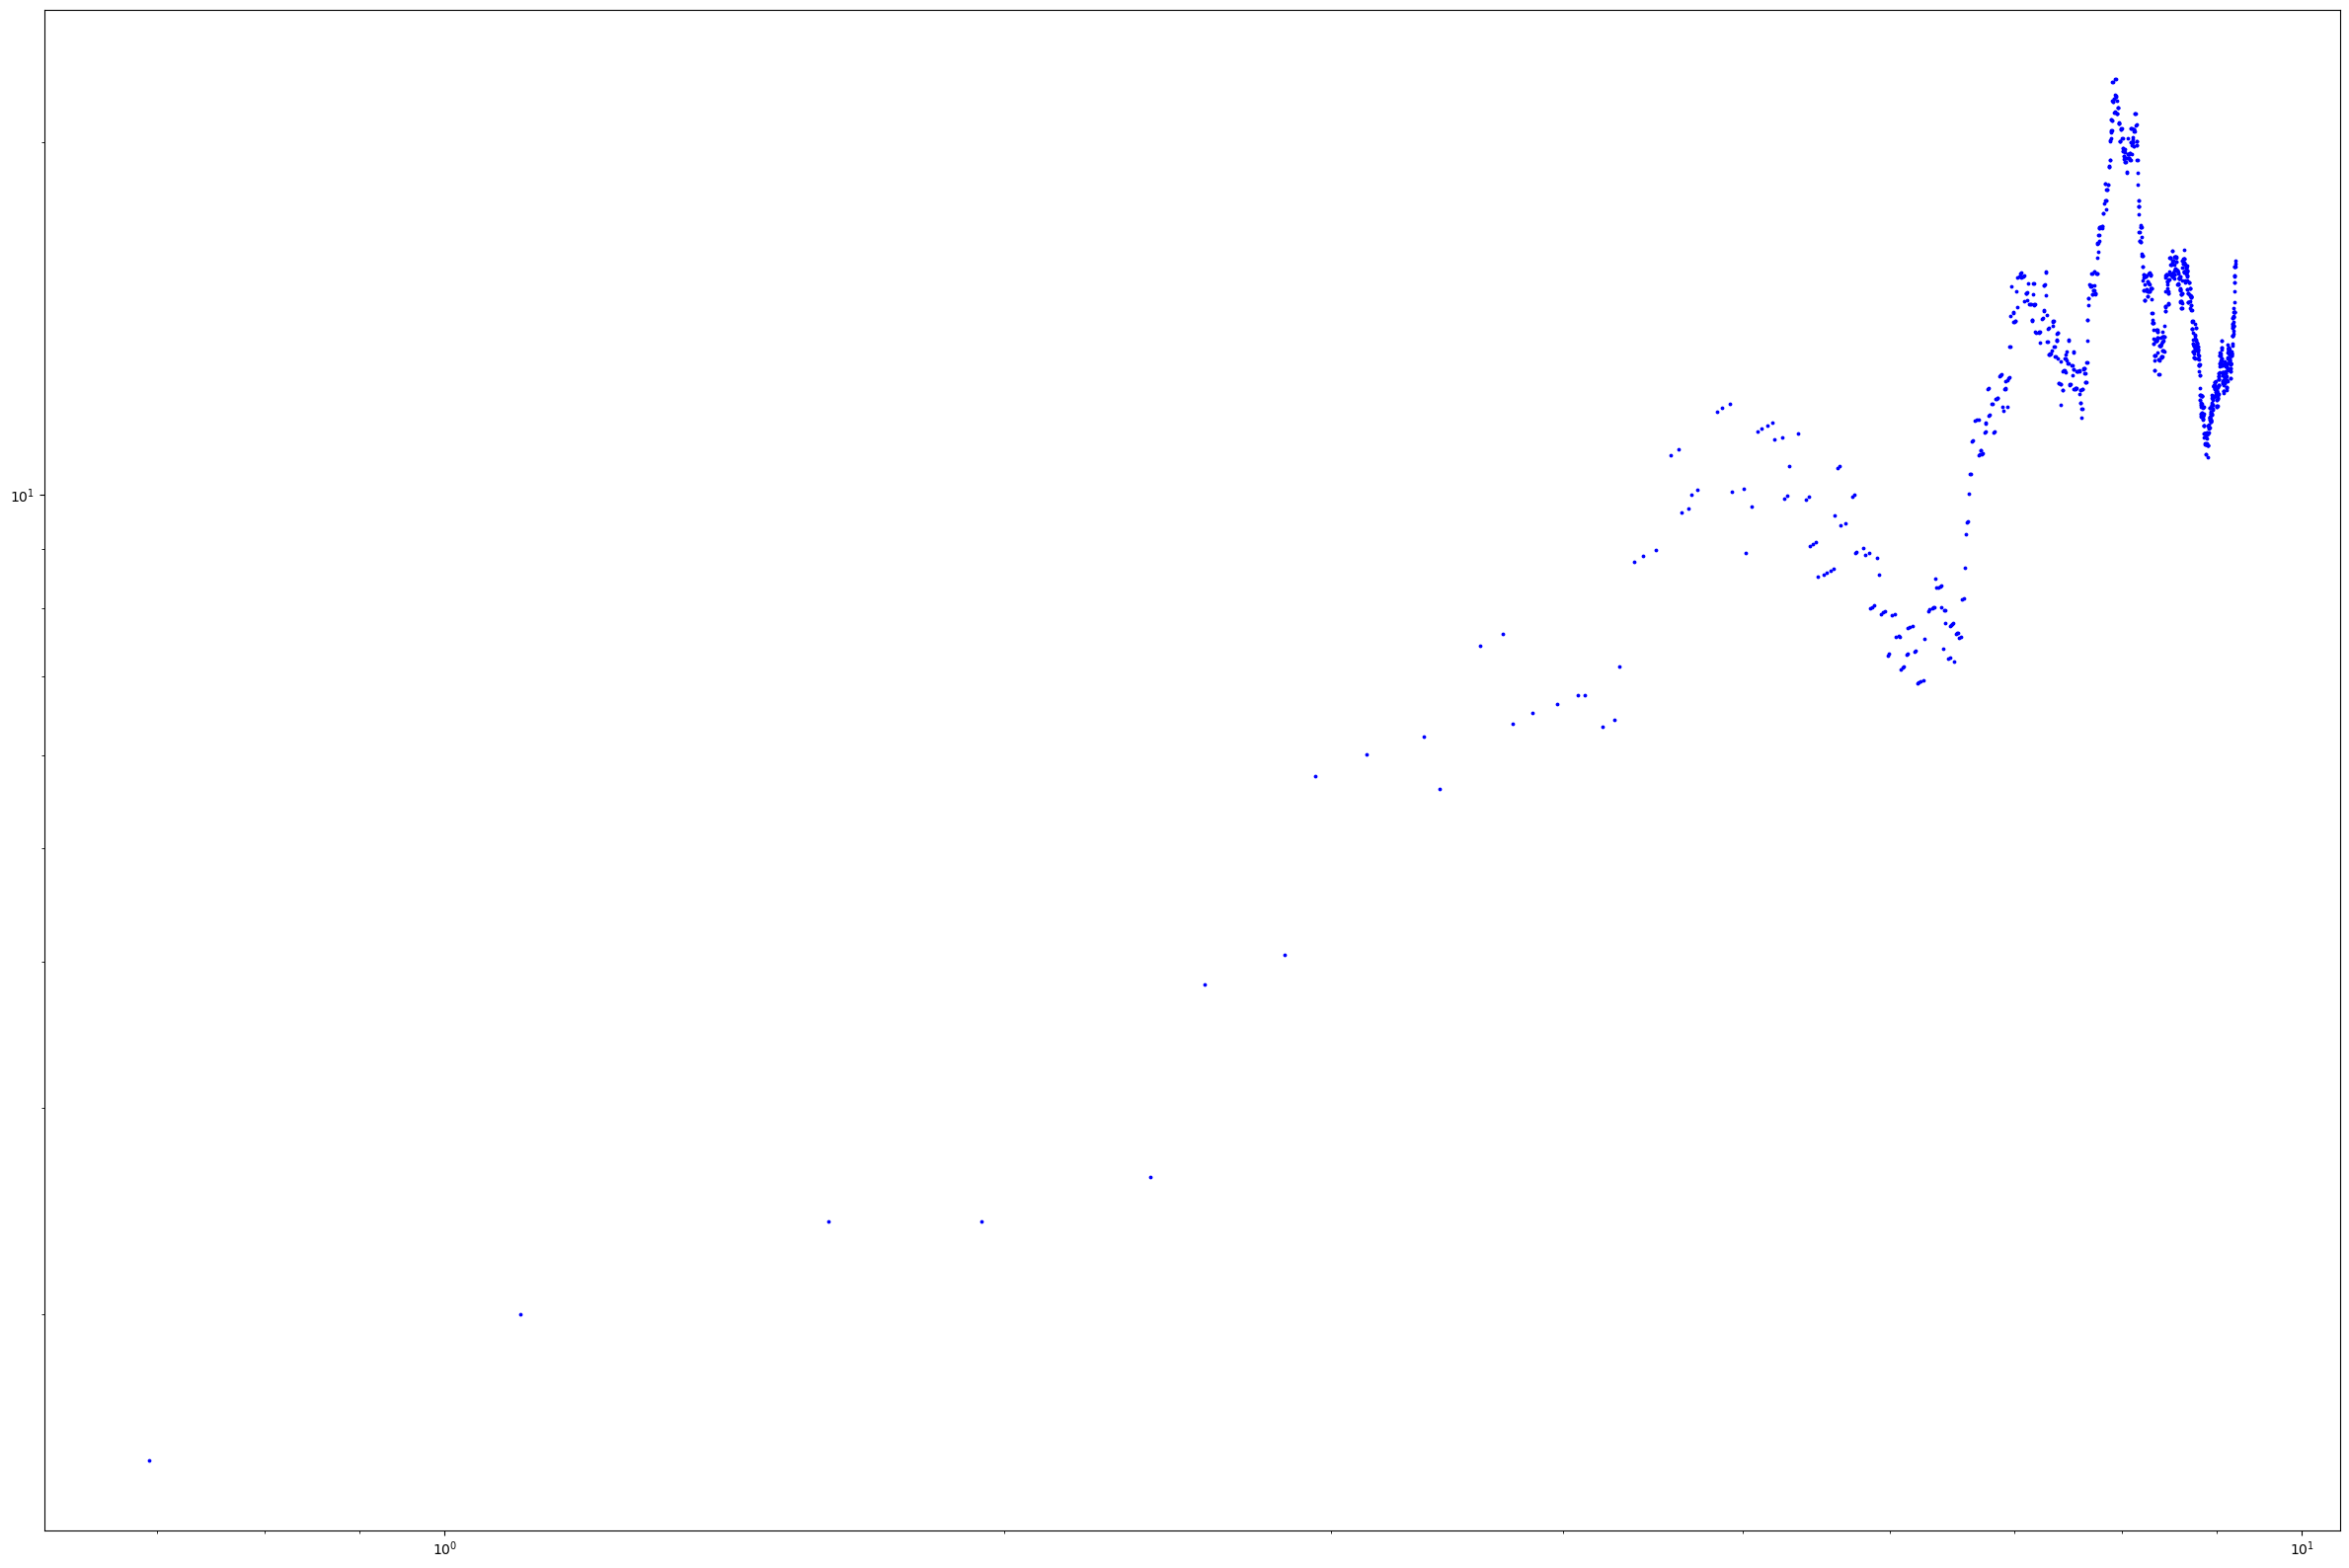

elapsed CPU time: 587.500209 seconds


In [48]:
plt.figure(figsize=(30, 20))

function counting_points(p) 
    s =0
    R, x = FiniteField(p, 1, "x")
    A_p = R(A)
    B_p = R(B)
    n_p = zeros(R,p)
    l_p = zeros(R,p)
    r_p = zeros(R,p)
    for k in 1:p
        n_p[k] = R(k)
    end
    
    for l in 1:p
        l_p[l] = n_p[l]^2
    end
    
    for m in 1:p
        r_p[m] = n_p[m]^3 + n_p[m]*A_p + B_p
    end
            
    for a in 1:p
        for b in 1:p
            if (l_p[a] == r_p[b])
                s += 1 
            end
        end
    end
    s+1
end
    

P = primes(N+1000)

function plot_bsd()
    product = 1.0
    i = 1
    while P[i] < N
        p = P[i]
        n = counting_points(p)
        product *= n/p
        plt.scatter(log(p), product, s=3, color="blue")
        i = i+1
    end
end

CPUtic()

plot_bsd()

CPUtoc()

plt.xscale("log")
plt.yscale("log")
plt.show()
